## Задание.<br>
1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
2. Загрузите датасет в pandas DataFrame под названием df.
3. Выполните предварительную обработку данных, выполнив следующие шаги:<br>
    a). Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).<br>
    b). Проверьте и обработайте любые дублирующиеся строки в датасете.<br>
    c). Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).
4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:<br>
    a). Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?<br>
    b). Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?<br>
    c). Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д.<br>
    d). Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.
5. Выполните проектирование признаков путем реализации следующих преобразований:<br>
    a). Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.<br>
    b). При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.
6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

Загрузим датасет в pandas DataFrame под названием df.

In [2]:
df = pd.read_csv('/content/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


В полученном датафрейме 1460 строк и 81 столбец.

Проверим датафрейм на отсутствующие значения.

1-й способ.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

2-й способ.

In [4]:
missing_data = df.isnull()
missing_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


В полученном датафрейме True - отсутствующее значение, False - заполенное значение.

In [5]:
# Выведм с помощбю цикла пропущенные значения в каждом столбце
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

Id
False    1460
Name: Id, dtype: int64
 
MSSubClass
False    1460
Name: MSSubClass, dtype: int64
 
MSZoning
False    1460
Name: MSZoning, dtype: int64
 
LotFrontage
False    1201
True      259
Name: LotFrontage, dtype: int64
 
LotArea
False    1460
Name: LotArea, dtype: int64
 
Street
False    1460
Name: Street, dtype: int64
 
Alley
True     1369
False      91
Name: Alley, dtype: int64
 
LotShape
False    1460
Name: LotShape, dtype: int64
 
LandContour
False    1460
Name: LandContour, dtype: int64
 
Utilities
False    1460
Name: Utilities, dtype: int64
 
LotConfig
False    1460
Name: LotConfig, dtype: int64
 
LandSlope
False    1460
Name: LandSlope, dtype: int64
 
Neighborhood
False    1460
Name: Neighborhood, dtype: int64
 
Condition1
False    1460
Name: Condition1, dtype: int64
 
Condition2
False    1460
Name: Condition2, dtype: int64
 
BldgType
False    1460
Name: BldgType, dtype: int64
 
HouseStyle
False    1460
Name: HouseStyle, dtype: int64
 
OverallQual
False    1460
Name: Over

Определим столбцы, где пропущенных записей больше 50%.

In [52]:
# Вычислим, чему равняется половина записей
str_half = len(df)/2

# Выведем "бракованные" столбцы на печать
bad_columns = df.columns[df.isna().sum() > str_half].tolist()
print(bad_columns)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


Поскольку в указанных столбцах процент пропущенных данных слишком большой, то имеет смысл их удалить.

In [7]:
df2 = df.drop(columns = bad_columns)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Ситуация улучшилась, однако остались другие стобцы с пропущенными данными. А именно:

In [9]:
almost_bad_columns = df2.columns[df2.isna().sum() > 1].tolist()
print(almost_bad_columns)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


Где:<br>
LotFrontage - Погонные футы улицы, соединенной с участком.<br> MasVnrType - Тип каменной облицовки.<br> MasVnrArea - Площадь каменной кладки в квадратных футах.<br> BsmtQual - Оценивает высоту подвала<br> BsmtCond - Оценивает общее состояние подвала.<br> BsmtExposure - Относится к стенам на уровне прохода или сада.<br> BsmtFinType1 - Оценка готовой площади подвала<br> BsmtFinType2 - Оценка готовой площади подвала (если несколько типов).<br> FireplaceQu - Качество камина.<br> GarageType - Расположение гаража.<br> GarageYrBlt - Год постройки гаража.<br> GarageFinish - Внутренняя отделка гаража.<br> GarageQual - Качество гаражаю<br> GarageCond - Состояние гаража.

Поскольку речь идет именно о продаже недвижимости, то вряд ли будет уместно заполнять пропущенные данные средними, медианными или нулевыми значениями. Поэтому данные стобцы также удалим. Будем считать, что эта информация риэлтором не предоставлена.

In [10]:
df3 = df2.drop(columns = almost_bad_columns)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

В новом датафрейме проверим наличие дубликатов.

In [11]:
duplicates = df3.duplicated()
duplicates_df3 = df3[duplicates]
duplicates_df3

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Дублирующихся значений нет.

In [12]:
df3.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


Типы данных в каждом столбце оставим без изменений.

 Проанализируем значения в столбце SalePrice. Определим наличие выбросов с помощью Z-score.

In [13]:
z = np.abs(stats.zscore(df3['SalePrice']))

# Установка порогового значения
threshold =3

# Выявление выбросов на основе Z-score
outliers = df3['SalePrice'][z > threshold]

# Определим среднее занчение в столбце SalePrice
mean_price = df3['SalePrice'].mean()

# Выведем данные полученные данные на печать
print(f'Средняя стоимость: {mean_price}')
print(f'Выбросы:\n{outliers}')


Средняя стоимость: 180921.19589041095
Выбросы:
58      438780
178     501837
185     475000
349     437154
389     426000
440     555000
473     440000
496     430000
527     446261
591     451950
664     423000
691     755000
769     538000
798     485000
803     582933
898     611657
1046    556581
1142    424870
1169    625000
1182    745000
1243    465000
1373    466500
Name: SalePrice, dtype: int64


На мой взгляд, вполне приемлемая картина для рынка недвижимости. Поэтому полученные значения выбросами считать не будем.

Проверим распределение цен на нормальность с помощью гистограммы.

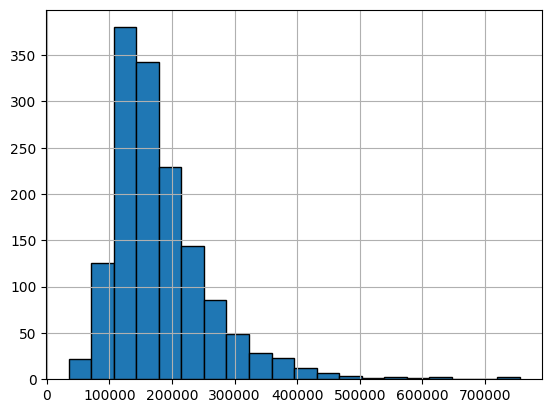

In [14]:
df3['SalePrice'].hist(edgecolor='black', bins=20);

Гистограмма не имеет "колокольчатой" формы. Следовательно, о нормальном распределении речь не идет. Хотя для недвижимости возможно такой разброс цен - обычное явление.

Посмотрим зависимость цен от размера участка.

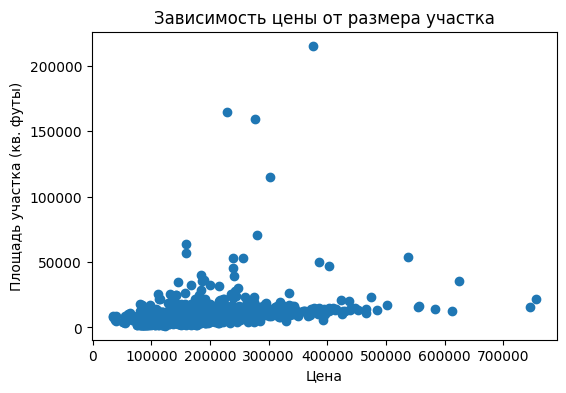

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(df3['SalePrice'], df3['LotArea'])
plt.title('Зависимость цены от размера участка')
plt.xlabel('Цена')
plt.ylabel('Площадь участка (кв. футы)');

Из полученного графика видно, что недвижимость с наибольшим участком не является самой дорогой. Следовательно, на цену влияют другие параметры.

In [16]:
# Недвижимость с макимальной ценой
df3[(df3['SalePrice'] == df3['SalePrice'].max())]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000


In [17]:
# Недвижимость с минимальной ценой
df3[(df3['SalePrice'] == df3['SalePrice'].min())]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),7879,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,115,0,0,0,0,11,2009,WD,Abnorml,34900


In [27]:
# Создадим датафрейм по следующим столбцам
matrix = df3[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']]
matrix

,SalePrice,OverallQual,GrLivArea,GarageCars
0,208500,7,1710,2
1,181500,6,1262,2
2,223500,7,1786,2
3,140000,7,1717,3
4,250000,8,2198,3
...,...,...,...,...
1455,175000,6,1647,2
1456,210000,6,2073,2
1457,266500,7,2340,1
1458,142125,5,1078,1


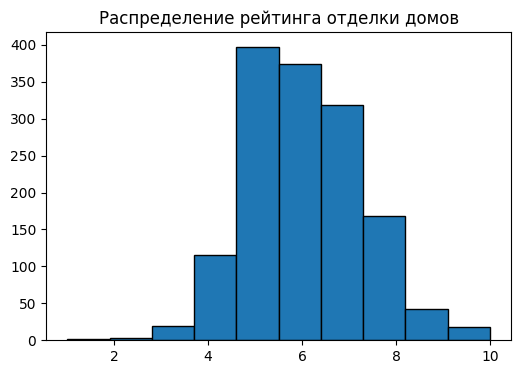

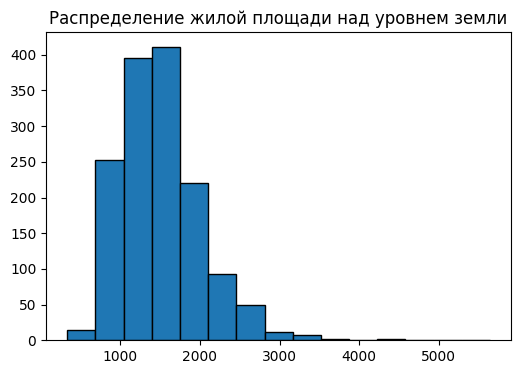

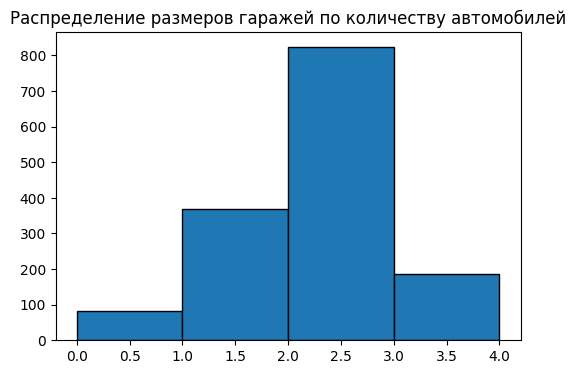

In [19]:
plt.figure(figsize=(6, 4))
plt.hist(df3['OverallQual'], edgecolor='black', bins=10)
plt.title('Распределение рейтинга отделки домов')

plt.figure(figsize=(6, 4))
plt.hist(df3['GrLivArea'], edgecolor='black', bins=15)
plt.title('Распределение жилой площади над уровнем земли');

plt.figure(figsize=(6, 4))
plt.hist(df3['GarageCars'], edgecolor='black', bins=4)
plt.title('Распределение размеров гаражей по количеству автомобилей');

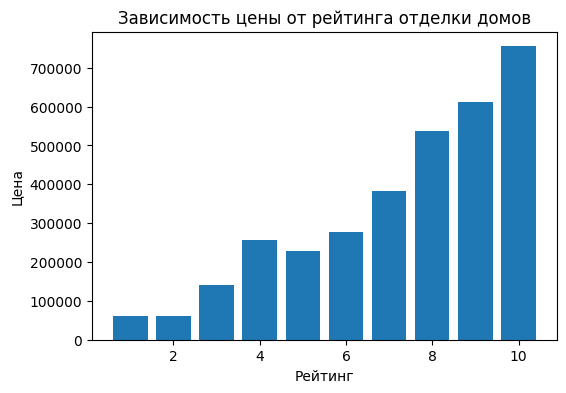

In [20]:
plt.figure(figsize=(6, 4))
plt.bar(df3['OverallQual'], df3['SalePrice'])
plt.title('Зависимость цены от рейтинга отделки домов')
plt.ylabel('Цена')
plt.xlabel('Рейтинг');

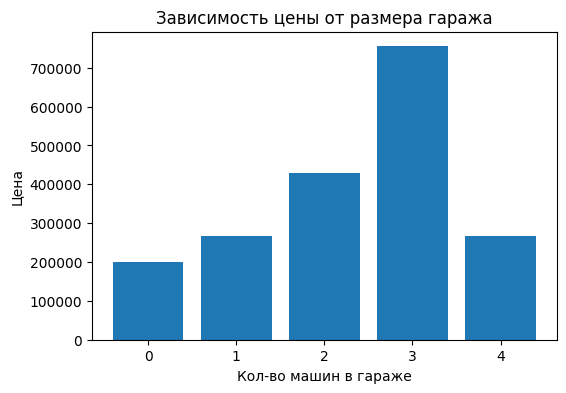

In [21]:
plt.figure(figsize=(6, 4))
plt.bar(df3['GarageCars'], df3['SalePrice'])
plt.title('Зависимость цены от размера гаража')
plt.ylabel('Цена')
plt.xlabel('Кол-во машин в гараже');

Определим зависимость цены от отделки дома, жилой площади и вместимостью гаража. Сделаем это с помщью тепловой карты из seaborn.

In [28]:
import seaborn as sns

In [30]:
# Создадим матрицу корредяций с помщью метода corr()
corr_matrix = matrix.corr()
corr_matrix

,SalePrice,OverallQual,GrLivArea,GarageCars
SalePrice,1.000000,0.790982,0.708624,0.640409
OverallQual,0.790982,1.000000,0.593007,0.600671
GrLivArea,0.708624,0.593007,1.000000,0.467247
GarageCars,0.640409,0.600671,0.467247,1.000000


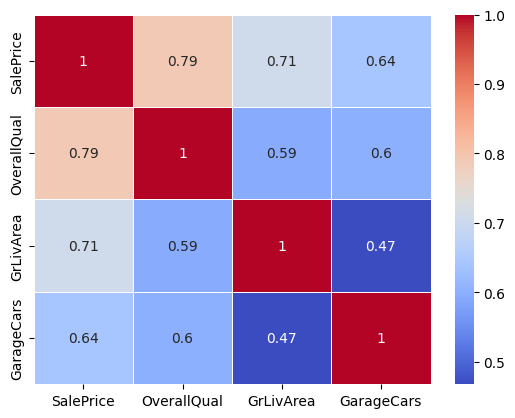

In [37]:
# Построим тепловую карту

sns.heatmap(corr_matrix, annot=True, linewidth=.5, cmap='coolwarm');

Из указанных характеристик самая сильная корреляция наблюдается между ценой и отделкой. Самая же слабая между ценой и вместительностью гаража.

Выполним label encoding для столбца 'RoofStyle' (тип кровли). Поскольку интересуюший нас столбец находится где-то по середине датафрейма, то для отображения результата выведем на печать только несколько столбцов, включая 'RoofStyle'.

In [48]:
le = LabelEncoder()
df3['RoofStyle'] = le.fit_transform(df3['RoofStyle'].astype(str))
df3[['Id', 'OverallQual', 'GrLivArea', 'GarageCars', 'RoofStyle', 'YrSold', 'SalePrice']].head(15)

,Id,OverallQual,GrLivArea,GarageCars,RoofStyle,YrSold,SalePrice
0,1,7,1710,2,1,2008,208500
1,2,6,1262,2,1,2007,181500
2,3,7,1786,2,1,2008,223500
3,4,7,1717,3,1,2006,140000
4,5,8,2198,3,1,2008,250000
5,6,5,1362,2,1,2009,143000
6,7,8,1694,2,1,2007,307000
7,8,7,2090,2,1,2009,200000
8,9,7,1774,2,1,2008,129900
9,10,5,1077,1,1,2008,118000


Как видно из результата, label encoding прошел успешно.

Теперь создадим сводную таблицу, где выведем года, в которых были продажи, и общую сумму проданной недвижимости.

In [49]:
new_matrix = df3[['Id', 'OverallQual',	'GrLivArea',	'GarageCars',	'RoofStyle',	'YrSold',	'SalePrice']]
pivot_data = new_matrix.pivot_table(index='YrSold', values='SalePrice', aggfunc='sum')
pivot_data

,SalePrice
YrSold,
2006,57320530
2007,61214777
2008,53917695
2009,60648051
2010,31043893


Сохраним обработанный датафрейм в новый csv файл.

In [51]:
df3.to_csv('cleaned_house_prices.csv', index= False)